In [15]:
# 导入所需的库
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# 定义文件夹路径
folder_path = "C:\\Users\\CJH\\Desktop\\tempeture" 

# 获取文件夹中的所有文件
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# 读取并合并所有CSV文件
dfs = [pd.read_csv(file) for file in file_paths]
merged_data = pd.concat(dfs, ignore_index=True)


In [21]:
city_vocab = {city: i for i, city in enumerate(merged_data['City'].unique())}
date_vocab = {date: i for i, date in enumerate(merged_data['dt'].unique())}

# 划分数据集
train_data, test_data = train_test_split(merged_data, test_size=0.2)

In [22]:
class ClimateDataset(Dataset):
    def __init__(self, data, city_vocab, date_vocab):
        self.data = data[['City', 'dt', 'AverageTemperature']]
        self.city_vocab = city_vocab
        self.date_vocab = date_vocab

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        city = torch.tensor(self.city_vocab[self.data.iloc[idx]['City']], dtype=torch.long)
        date = torch.tensor(self.date_vocab[self.data.iloc[idx]['dt']], dtype=torch.long)
        temperature = torch.tensor(self.data.iloc[idx]['AverageTemperature'], dtype=torch.float)
        return city, date, temperature

# 创建数据加载器
train_dataset = ClimateDataset(train_data, city_vocab, date_vocab)
test_dataset = ClimateDataset(test_data, city_vocab, date_vocab)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [23]:
class DialogueModel(nn.Module):
    def __init__(self, num_cities, num_dates, embedding_dim, hidden_dim, output_dim):
        super(DialogueModel, self).__init__()
        # 定义城市和日期的嵌入层
        self.city_embedding_layer = nn.Embedding(num_embeddings=num_cities, embedding_dim=embedding_dim)
        self.date_embedding_layer = nn.Embedding(num_embeddings=num_dates, embedding_dim=embedding_dim)
        
        # 定义全连接层
        self.fc1 = nn.Linear(in_features=2 * embedding_dim, out_features=hidden_dim)
        self.fc2 = nn.Linear(in_features=hidden_dim, out_features=output_dim)
        
        # 定义激活函数
        self.activation = nn.ReLU()
    
    def forward(self, city, date):
        # 将城市和日期转换为嵌入向量
        city_embedding = self.city_embedding_layer(city)
        date_embedding = self.date_embedding_layer(date)
        
        # 连接城市和日期嵌入
        combined = torch.cat((city_embedding, date_embedding), dim=1)
        
        # 通过全连接层
        hidden = self.fc1(combined)
        hidden = self.activation(hidden)
        output = self.fc2(hidden)
        
        return output

In [24]:
model = DialogueModel(num_cities=len(city_vocab), num_dates=len(date_vocab), embedding_dim=50, hidden_dim=64, output_dim=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for city, date, temperature in train_dataloader:
        optimizer.zero_grad()
        # 前向传播
        outputs = model(city, date)
        # 计算损失
        loss = criterion(outputs, temperature.unsqueeze(1))  # 将 temperature 张量扩展以匹配输出的形状
        # 反向传播
        loss.backward()
        # 更新权重
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")

Epoch [1/10], Loss: nan


KeyboardInterrupt: 

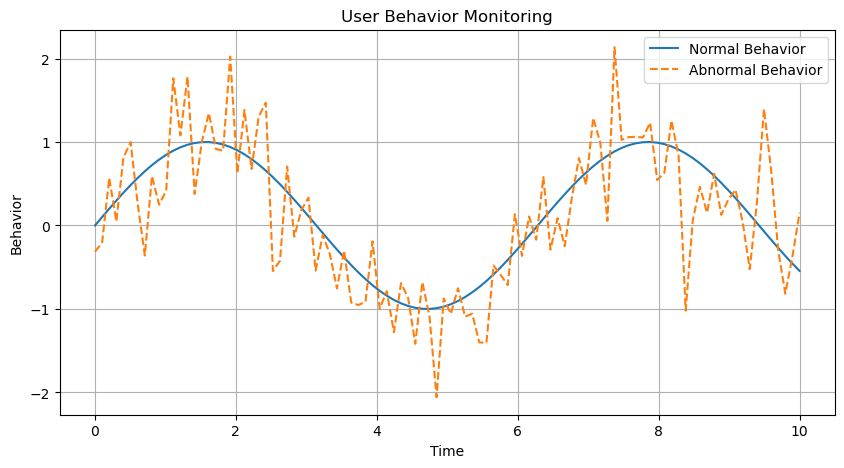

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
time = np.linspace(0, 10, 100)
normal_behavior = np.sin(time)
abnormal_behavior = np.sin(time) + np.random.normal(0, 0.5, time.shape)

plt.figure(figsize=(10, 5))
plt.plot(time, normal_behavior, label='Normal Behavior')
plt.plot(time, abnormal_behavior, label='Abnormal Behavior', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Behavior')
plt.title('User Behavior Monitoring')
plt.legend()
plt.grid(True)
plt.show()


d:\anaconda\envs\trainmodel\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


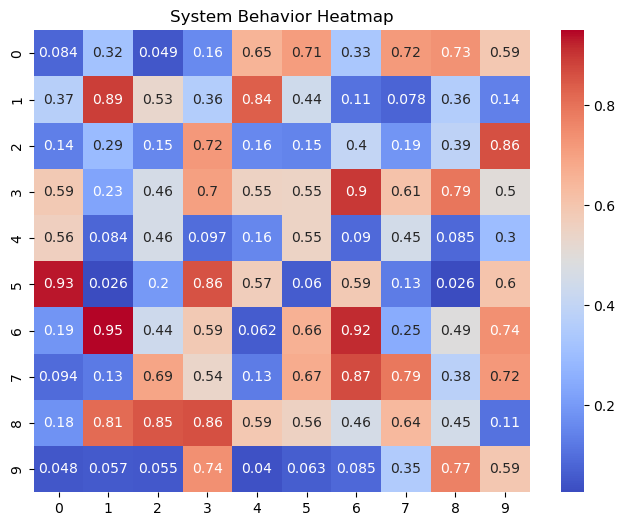

In [2]:
import seaborn as sns
import numpy as np

# 生成数据
data = np.random.rand(10, 10)

plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, cmap='coolwarm', cbar=True)
plt.title('System Behavior Heatmap')
plt.show()


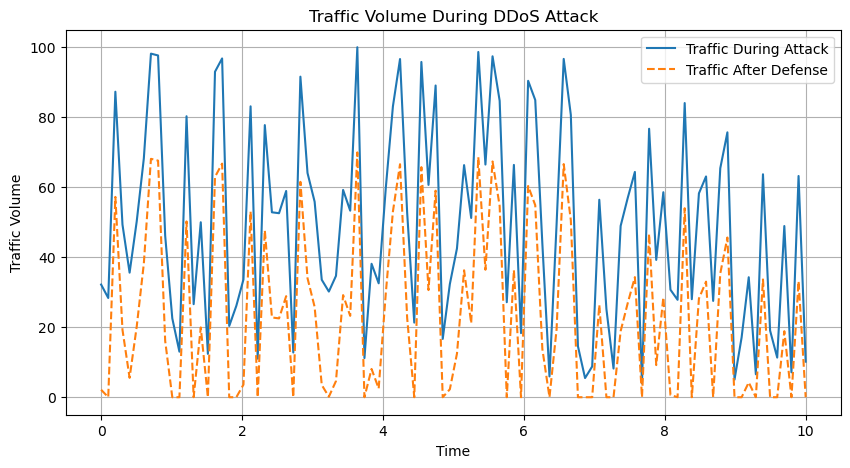

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
time = np.linspace(0, 10, 100)
traffic = np.random.rand(100) * 100
traffic_after_defense = np.clip(traffic - 30, 0, None)

plt.figure(figsize=(10, 5))
plt.plot(time, traffic, label='Traffic During Attack')
plt.plot(time, traffic_after_defense, label='Traffic After Defense', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume During DDoS Attack')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import pandas as pd

# 生成数据
data = {
    'Time': ['2024-06-01 12:00', '2024-06-01 12:05', '2024-06-01 12:10'],
    'Attack Type': ['DDoS', 'SQL Injection', 'Phishing'],
    'Defense Action': ['Traffic Throttling', 'SQL Filtering', 'Email Filtering'],
    'Status': ['Mitigated', 'Mitigated', 'Blocked']
}

df = pd.DataFrame(data)

print(df)

               Time    Attack Type      Defense Action     Status
0  2024-06-01 12:00           DDoS  Traffic Throttling  Mitigated
1  2024-06-01 12:05  SQL Injection       SQL Filtering  Mitigated
2  2024-06-01 12:10       Phishing     Email Filtering    Blocked


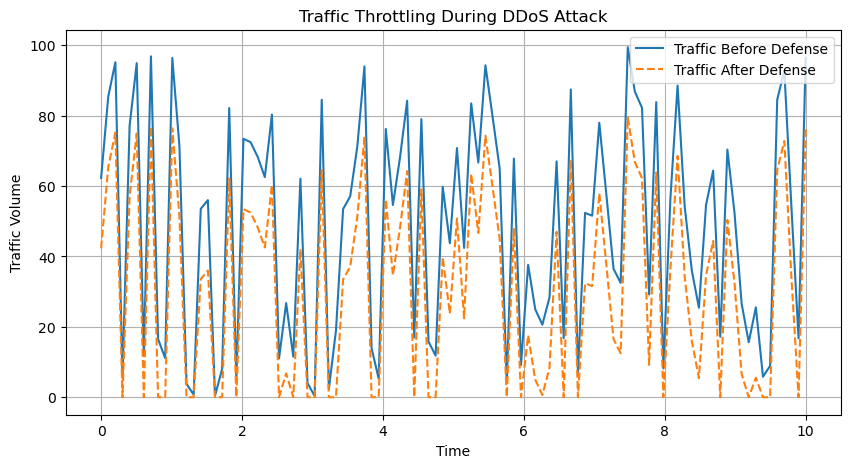

In [5]:
import matplotlib.pyplot as plt

# 生成数据
time = np.linspace(0, 10, 100)
traffic_before = np.random.rand(100) * 100
traffic_after = np.clip(traffic_before - 20, 0, None)

plt.figure(figsize=(10, 5))
plt.plot(time, traffic_before, label='Traffic Before Defense')
plt.plot(time, traffic_after, label='Traffic After Defense', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Throttling During DDoS Attack')
plt.legend()
plt.grid(True)
plt.show()


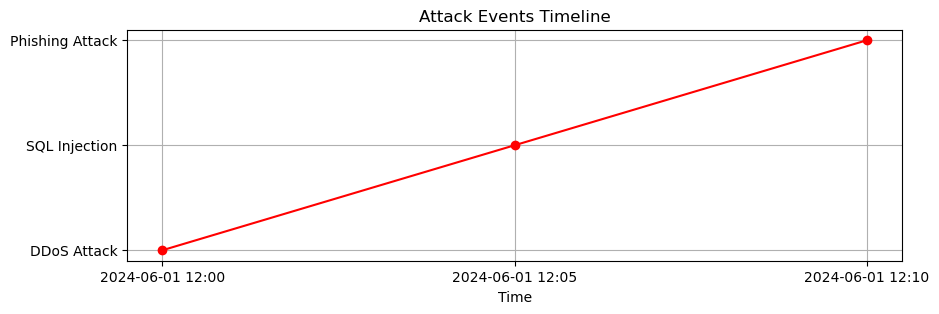

In [6]:
import matplotlib.pyplot as plt

# 生成数据
events = ['DDoS Attack', 'SQL Injection', 'Phishing Attack']
times = ['2024-06-01 12:00', '2024-06-01 12:05', '2024-06-01 12:10']

plt.figure(figsize=(10, 3))
plt.plot(times, [1, 2, 3], 'ro-')
plt.yticks([1, 2, 3], events)
plt.xlabel('Time')
plt.title('Attack Events Timeline')
plt.grid(True)
plt.show()


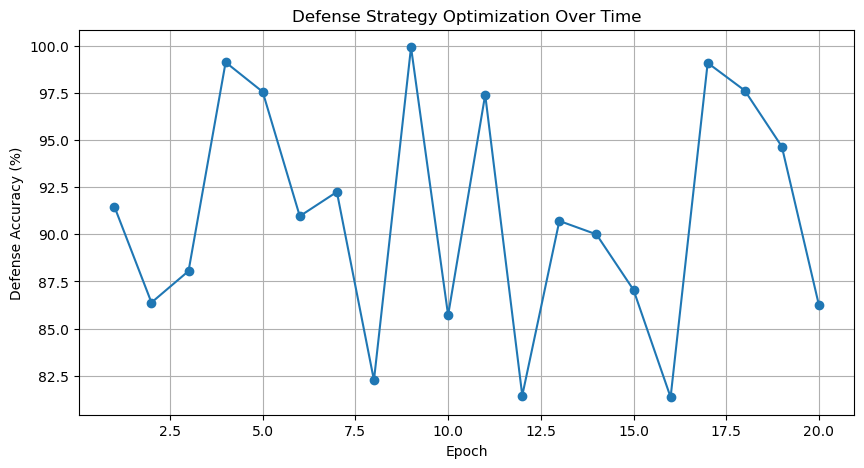

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
epochs = np.arange(1, 21)
accuracy = np.random.rand(20) * 20 + 80

plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Defense Accuracy (%)')
plt.title('Defense Strategy Optimization Over Time')
plt.grid(True)
plt.show()


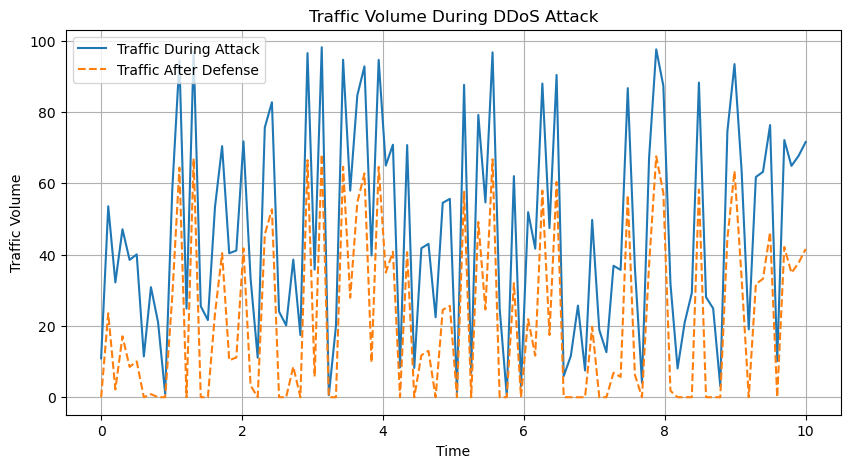

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
time = np.linspace(0, 10, 100)
traffic = np.random.rand(100) * 100
traffic_after_defense = np.clip(traffic - 30, 0, None)

plt.figure(figsize=(10, 5))
plt.plot(time, traffic, label='Traffic During Attack')
plt.plot(time, traffic_after_defense, label='Traffic After Defense', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume During DDoS Attack')
plt.legend()
plt.grid(True)
plt.show()


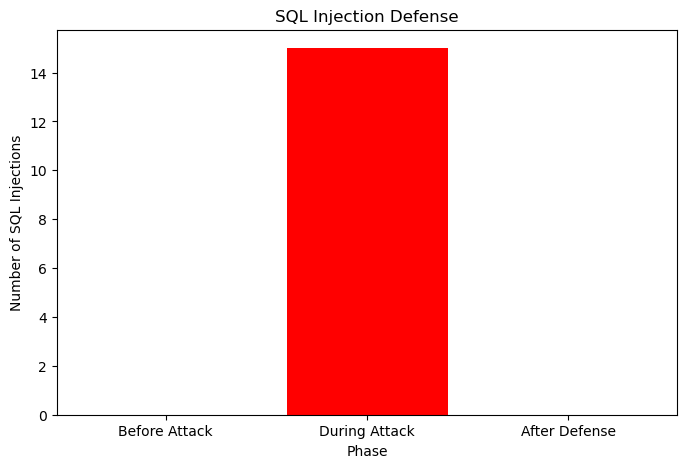

In [9]:
import matplotlib.pyplot as plt

# 生成数据
time = ['Before Attack', 'During Attack', 'After Defense']
sql_injections = [0, 15, 0]

plt.figure(figsize=(8, 5))
plt.bar(time, sql_injections, color=['green', 'red', 'blue'])
plt.xlabel('Phase')
plt.ylabel('Number of SQL Injections')
plt.title('SQL Injection Defense')
plt.show()


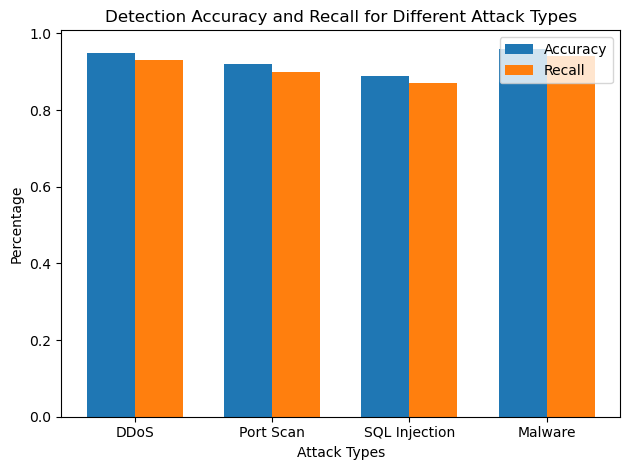

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
attack_types = ['DDoS', 'Port Scan', 'SQL Injection', 'Malware']
accuracy = [0.95, 0.92, 0.89, 0.96]
recall = [0.93, 0.90, 0.87, 0.94]

x = np.arange(len(attack_types))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
bars2 = ax.bar(x + width/2, recall, width, label='Recall')

ax.set_xlabel('Attack Types')
ax.set_ylabel('Percentage')
ax.set_title('Detection Accuracy and Recall for Different Attack Types')
ax.set_xticks(x)
ax.set_xticklabels(attack_types)
ax.legend()

fig.tight_layout()

plt.show()

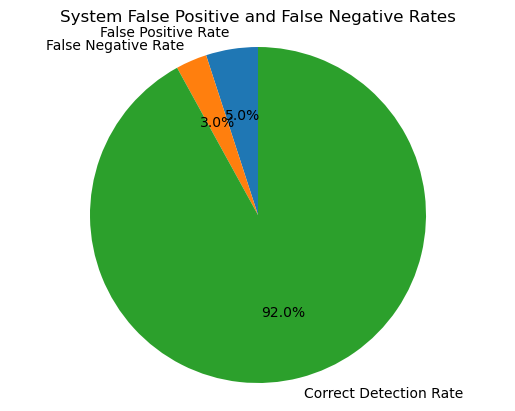

In [5]:
labels = ['False Positive Rate', 'False Negative Rate', 'Correct Detection Rate']
sizes = [5, 3, 92]  # Sample data

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('System False Positive and False Negative Rates')
plt.show()

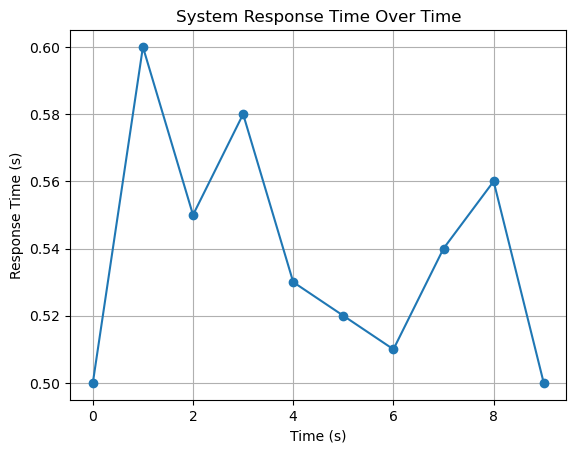

In [6]:
time = np.arange(0, 10, 1)  # Assumed time range
response_time = [0.5, 0.6, 0.55, 0.58, 0.53, 0.52, 0.51, 0.54, 0.56, 0.50]  # Assumed response time data

plt.plot(time, response_time, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Response Time (s)')
plt.title('System Response Time Over Time')
plt.grid(True)
plt.show()